In [54]:
%load_ext autoreload
%autoreload 2
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

MPL_CUSTOM = {
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.dpi': 120,
    'figure.figsize': (4, 3.5),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'xtick.minor.visible': True,
    'ytick.right': True,
    'ytick.direction': 'in',
    'ytick.minor.visible': True,
}

for k, v in MPL_CUSTOM.items():
    mpl.rcParams[k] = v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
project_dir = Path(os.environ['CONDA_PREFIX']).parent.absolute()
current_dir = project_dir / 'scratch/ana/result/sbtTime'

In [56]:
files = sorted(list(current_dir.glob('*.txt')))

files = sorted([current_dir / f'data{idx}.txt' for idx in range(1147, 1130)])

df_list = [pd.read_csv(str(f), sep=r'\s+', header=None, names=['iEvt', 'sbt1', 'sbt2']) for f in files]

for i in range(len(df_list)):
    df_list[i].astype({'iEvt': 'float64', 'sbt1': 'float64', 'sbt2': 'float64'})
    
df_sbt1_list = [
    pd.DataFrame({'x' : df['iEvt'], 'y' : df['sbt1']}) for df in df_list
]
df_sbt2_list = [
    pd.DataFrame({'x' : df['iEvt'], 'y' : df['sbt2']}) for df in df_list
]


In [57]:
total_events = 0
for i in range(len(df_sbt1_list)):
    df_sbt1_list[i]['x'] += total_events
    df_sbt2_list[i]['x'] += total_events
    total_events += len(df_sbt1_list[i])

df_sbt1_list = {idx + 1036 : df for idx, df in enumerate(df_sbt1_list)}
df_sbt2_list = {idx + 1036 : df for idx, df in enumerate(df_sbt2_list)}

In [58]:
def rebin(df, bins, range_):
    hist, edges = np.histogram(
        df.x.values, 
        weights=df.y.values,
        bins=bins, 
        range=range_
    )
    entries, _ = np.histogram(
        df.x.values,
        bins=bins, 
        range=range_
    )

    hist = hist.astype('float64')
    entries = entries.astype('float64')

    return pd.DataFrame({
        'x' : 0.5 * (edges[:-1] + edges[1:]),
        'y' : np.divide(hist, entries, out=np.zeros_like(hist), where=entries!=0)
    })

In [59]:
binning = 1000
df_sbt1_rebin = {}
df_sbt2_rebin = {}

total_events = 0
for idx, df in df_sbt1_list.items():
    df = df.copy()
    rangeh = np.ceil(((df.x.values[-1] + 1)) / 10000) * 10000
    rangel = np.floor((df.x.values[0] + total_events)  / 10000) * 10000
    nbins = int((rangeh - rangel) / binning)
    print(idx, rangel, rangeh, nbins)
    
    df_sbt1_rebin[idx] = rebin(df, nbins, (rangel, rangeh))
    df_sbt2_rebin[idx] = rebin(df_sbt2_list[idx], nbins, (rangel, rangeh))


1036 0.0 60000.0 60
1037 50000.0 120000.0 70
1038 110000.0 120000.0 10
1039 110000.0 180000.0 70
1040 170000.0 220000.0 50
1041 210000.0 250000.0 40
1042 240000.0 330000.0 90
1043 320000.0 390000.0 70
1044 380000.0 400000.0 20
1045 390000.0 550000.0 160
1046 540000.0 670000.0 130
1047 660000.0 680000.0 20
1048 670000.0 750000.0 80


In [60]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(df_sbt1_rebin))]

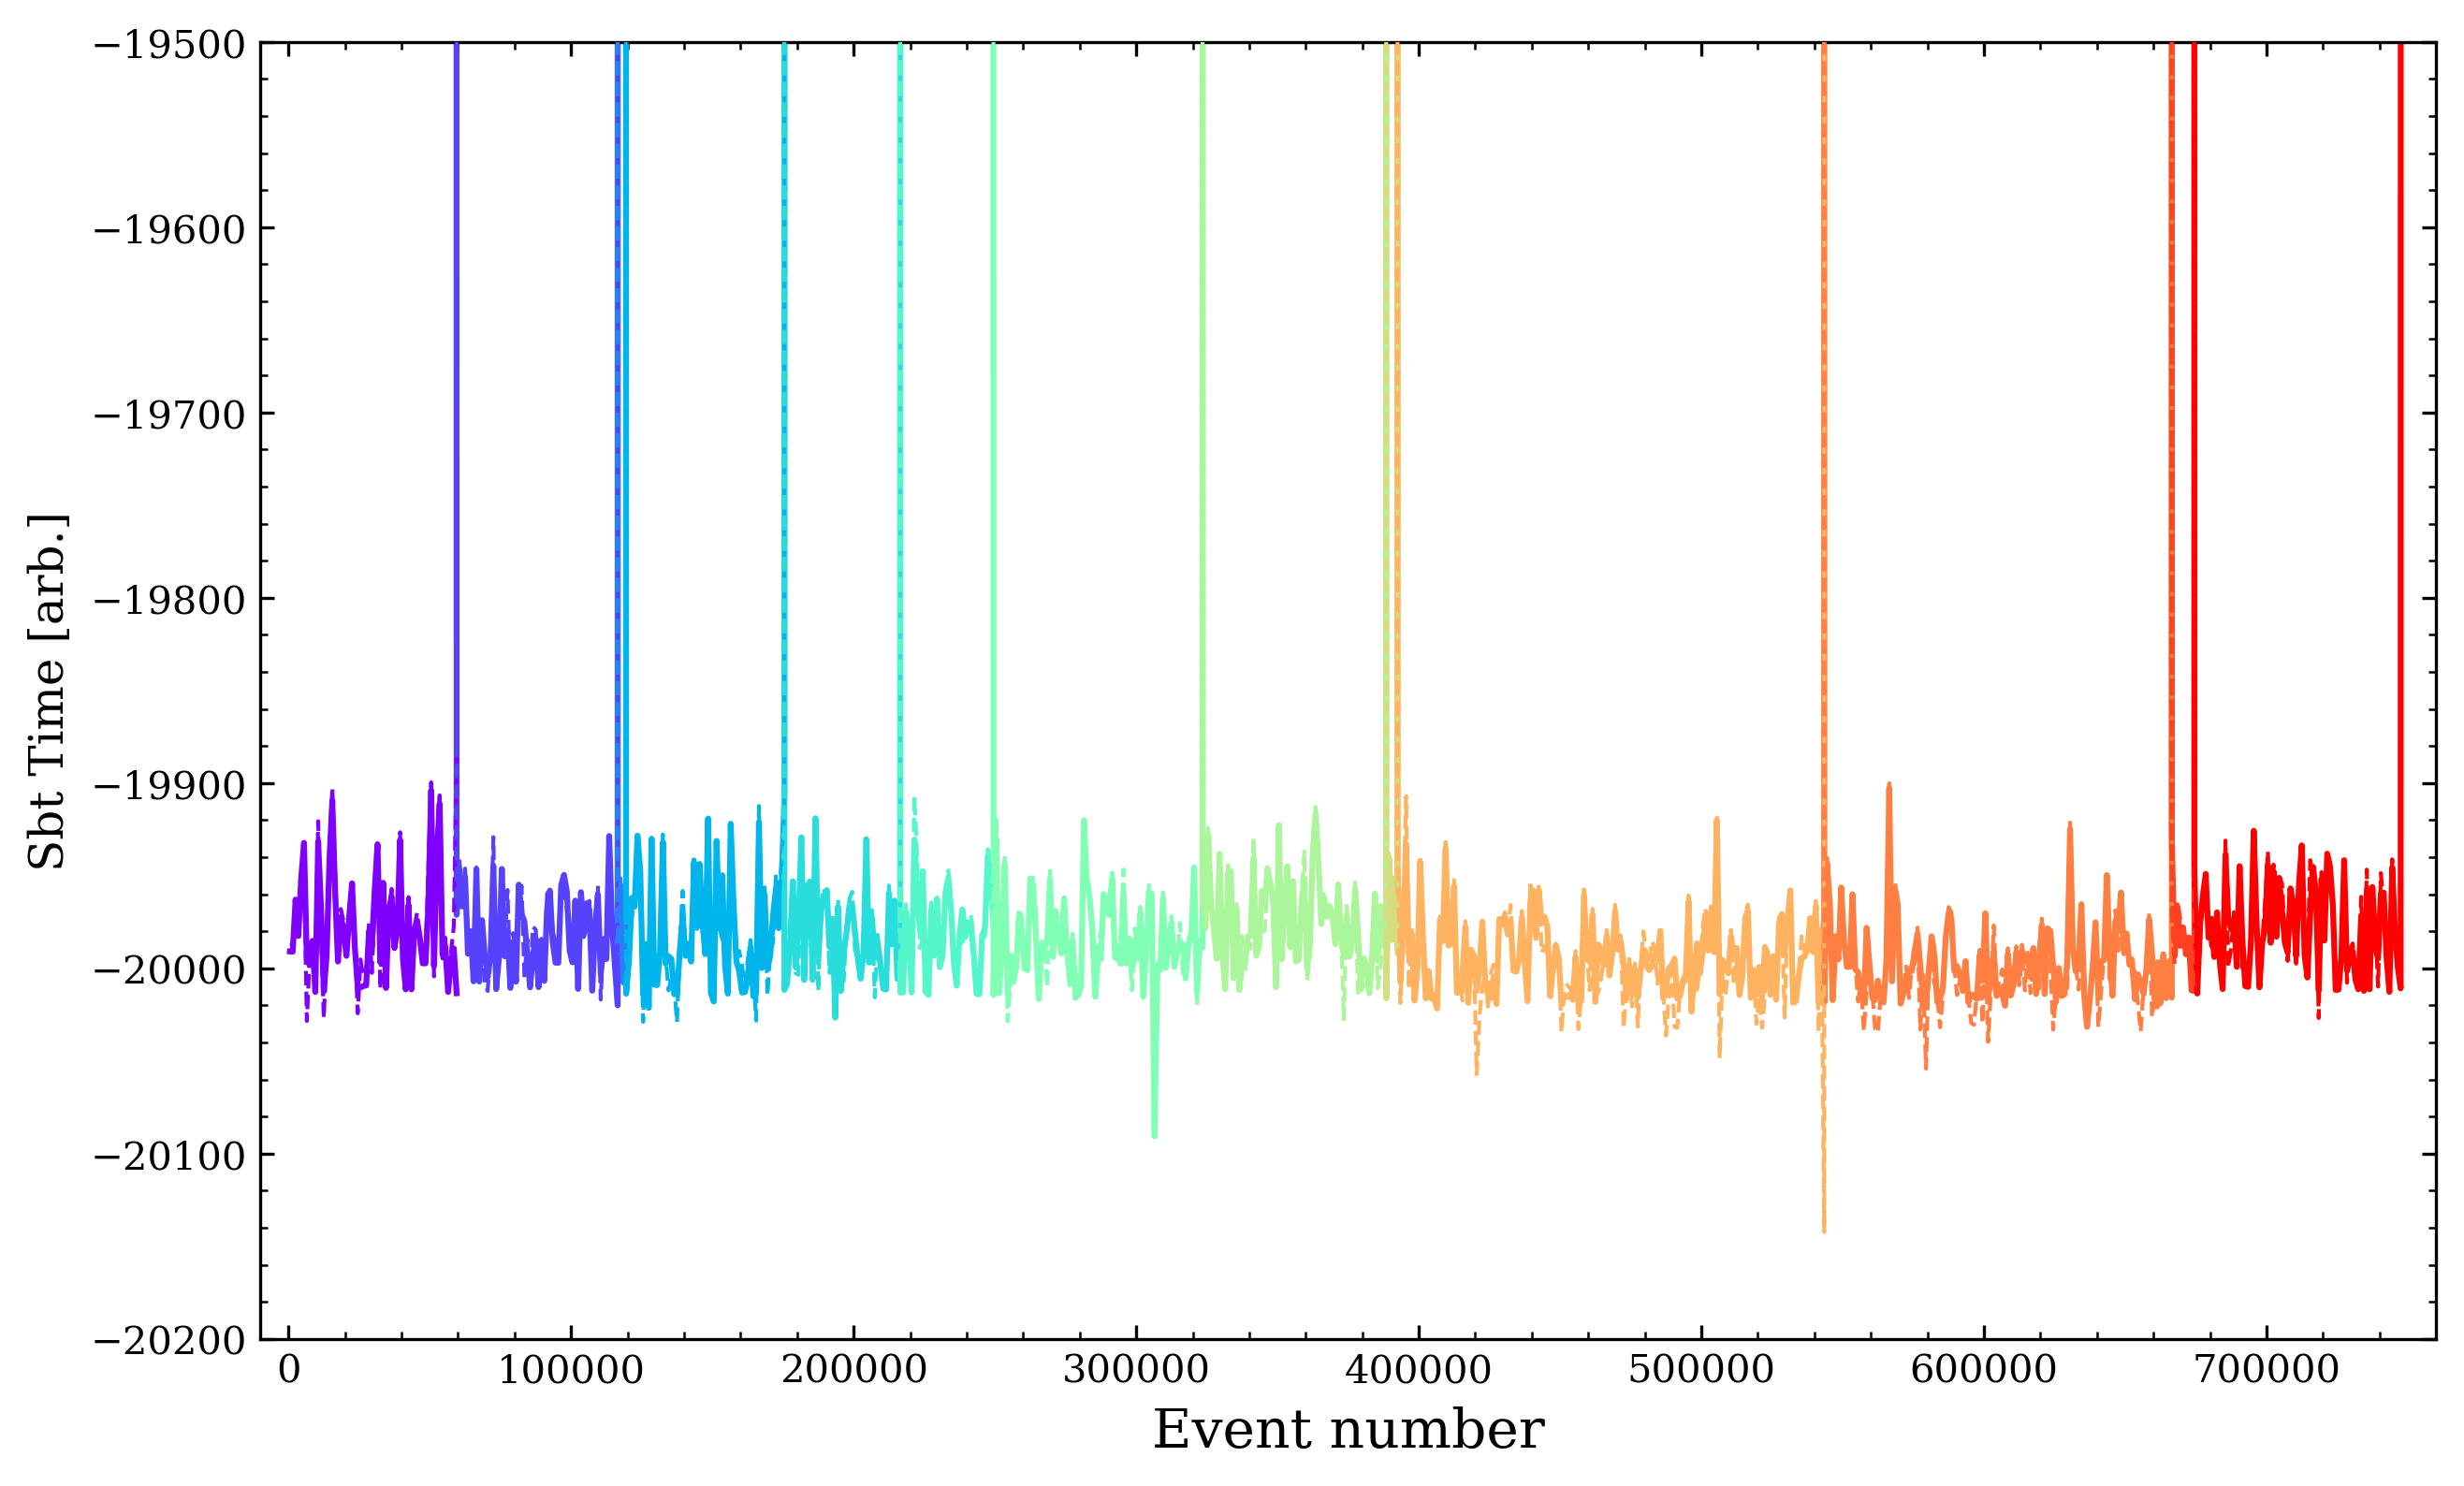

In [64]:
fig, ax = plt.subplots(
    figsize=(10, 6),
    facecolor='white',
    dpi=300,
)

for idx, irun in enumerate(df_sbt1_rebin.keys()):
    # print(len(df_sbt1_rebin[irun]))
    # print(df_sbt1_rebin[irun].x.values[-1])
    # if irun != 1045:
    #     continue
    ax.plot(
        df_sbt1_rebin[irun].x.values,
        df_sbt1_rebin[irun].y.values,
        color=colors[idx],
        # label=f'Run {idx}',
    )

    ax.plot(
        df_sbt2_rebin[irun].x.values,
        df_sbt2_rebin[irun].y.values,
        color=colors[idx],
        linestyle='--',
        linewidth=1,
        zorder=10
        # label=f'Run {idx}',
    )

ax.set_xlim(-10000, 760000)
# ax.set_ylim(37000,38000)
# ax.set_ylim(-20025,-19925)
ax.set_ylim(-20200,-19500)



ax.set_xlabel('Event number', fontsize=14)
ax.set_ylabel(
    r'Sbt Time [arb.]', 
    fontsize=12
)

# ax.annotate(
#     'SBT 1 (thin)',
#     xy=(0.1, 0.9),
#     xycoords='axes fraction',
#     fontsize=12,
#     ha='left',
#     va='top',
#     bbox=dict(
#         boxstyle='round',
#         edgecolor='black',
#         facecolor='white',
#         alpha=0.1
#     )
# )

# ax.annotate(
#     'SBT 2 (thick)',
#     xy=(0.1, 0.3),
#     xycoords='axes fraction',
#     fontsize=12,
#     ha='left',
#     va='top',
#     bbox=dict(
#         boxstyle='round',
#         edgecolor='black',
#         facecolor='white',
#         alpha=0.1
#     )
# )

plt.show()

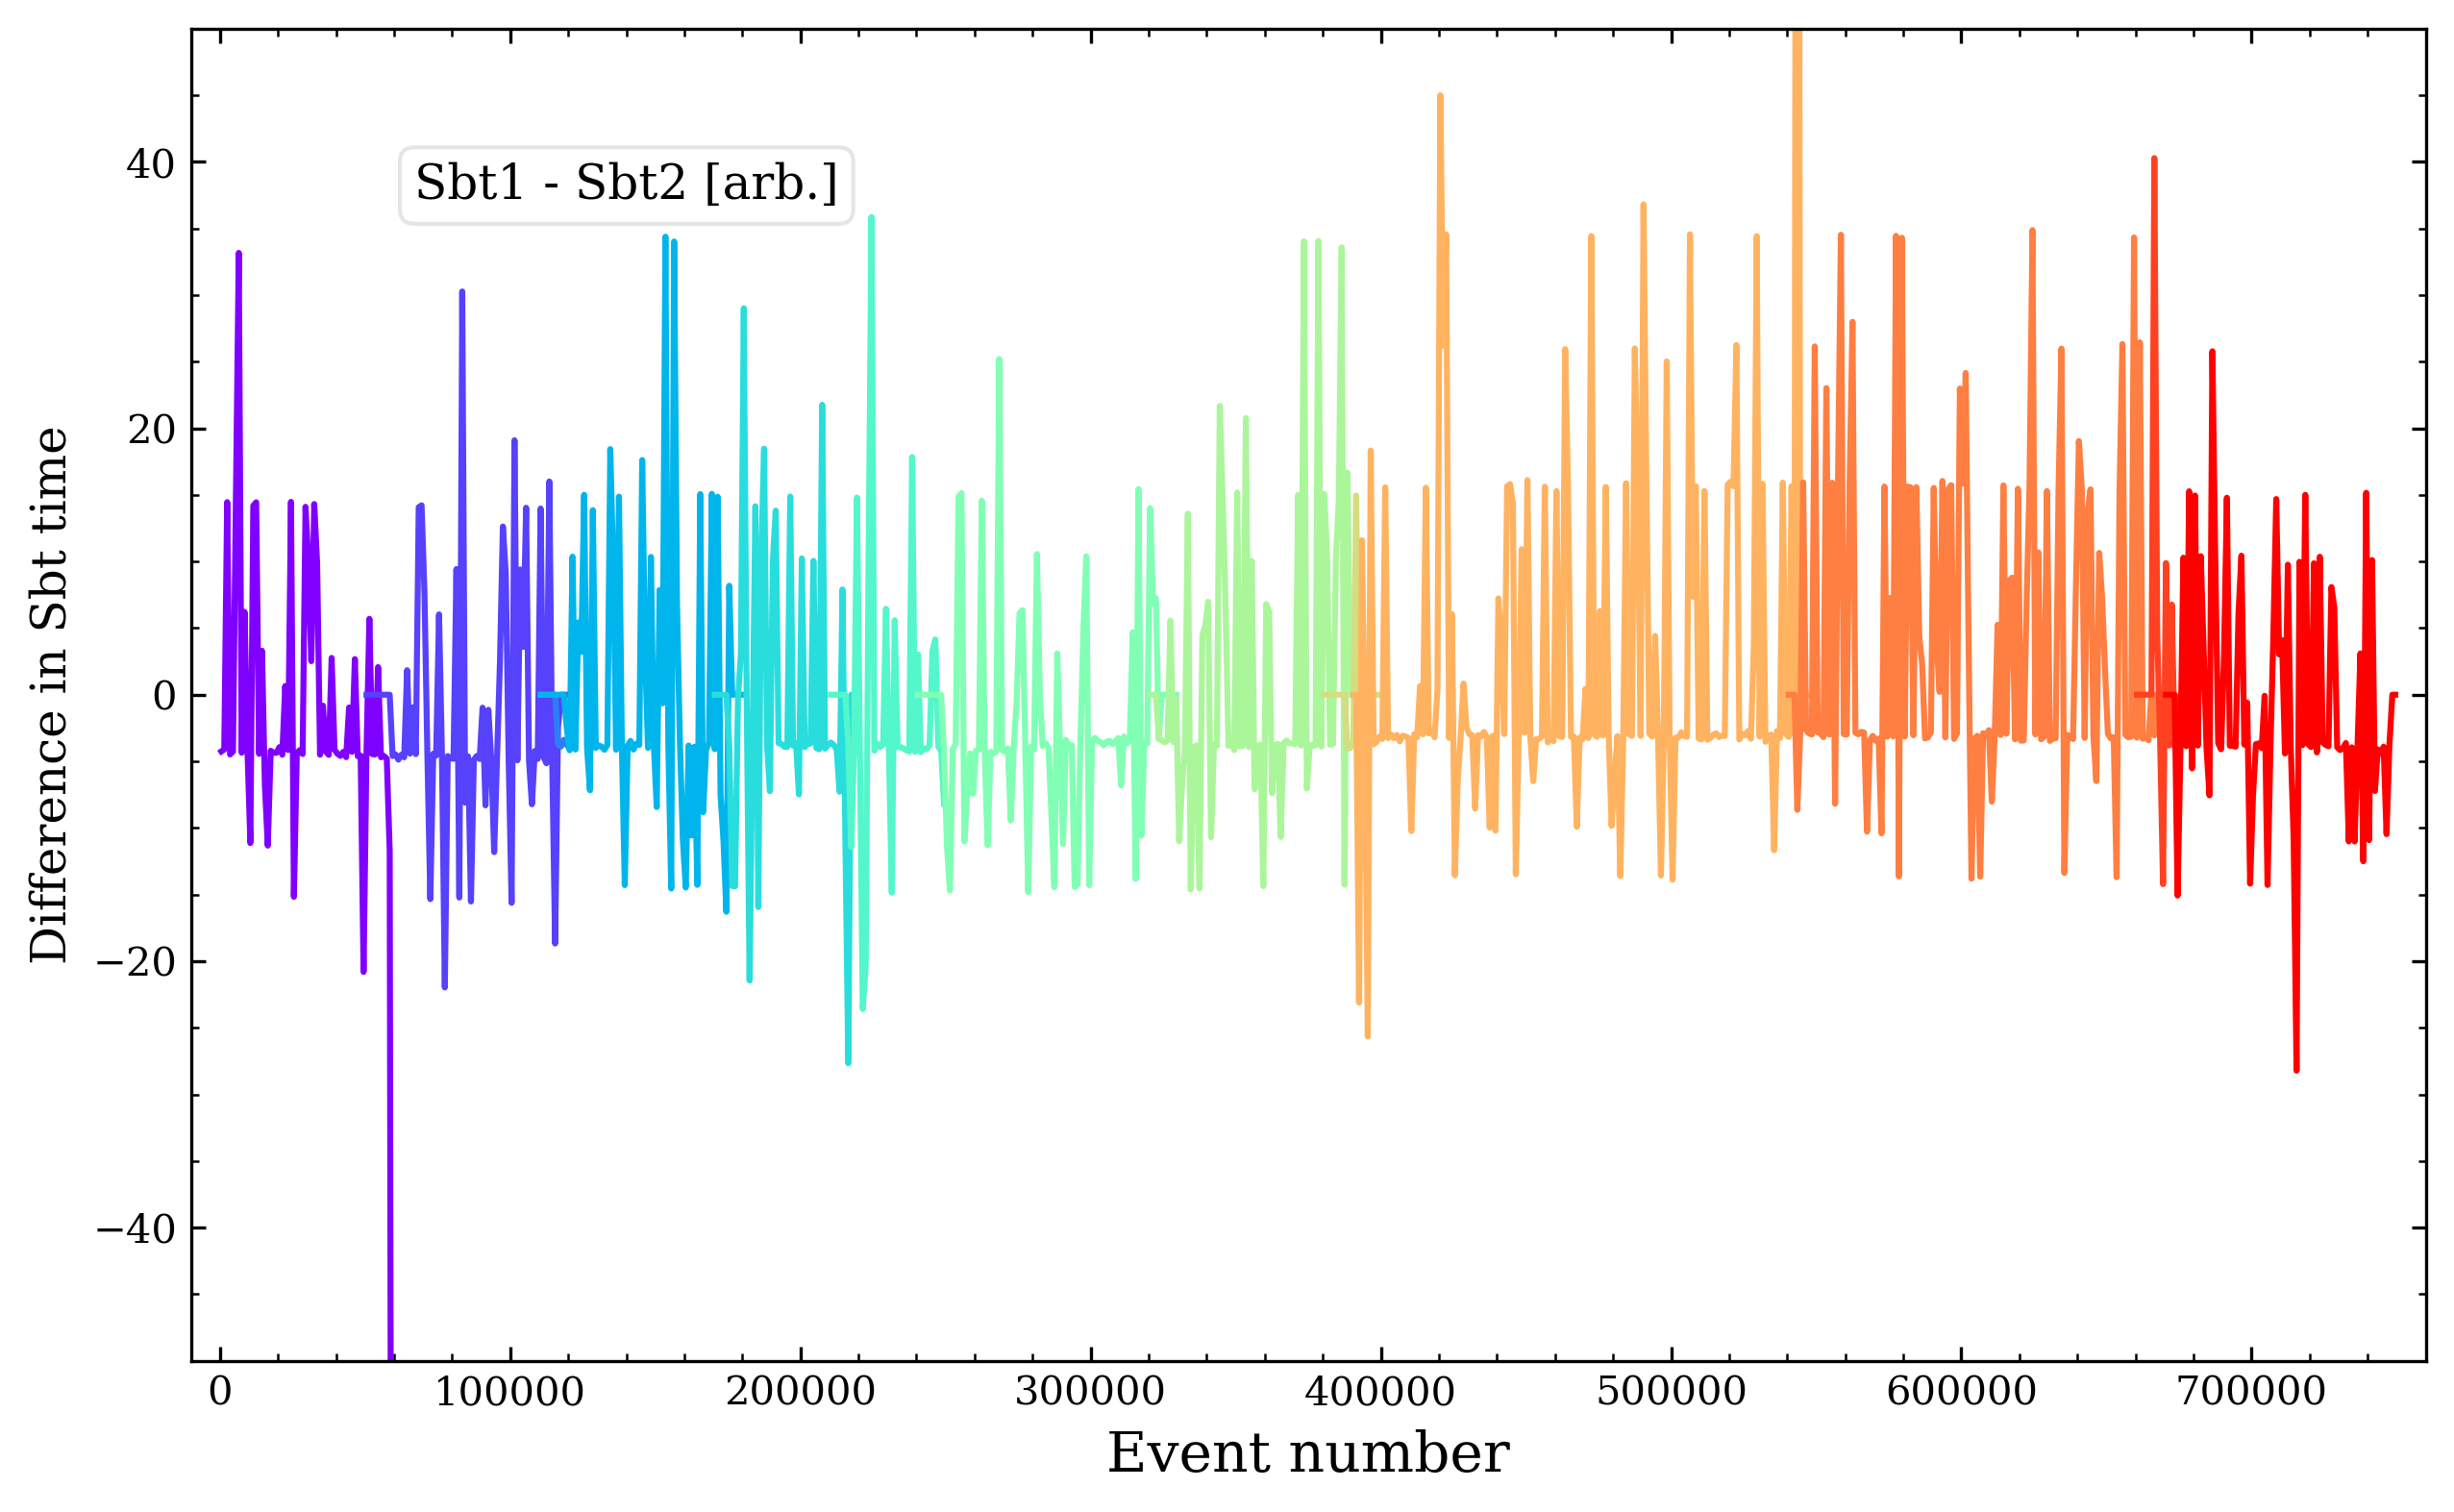

In [62]:
fig, ax = plt.subplots(
    figsize=(10, 6),
    facecolor='white',
    dpi=300,
)

for idx, irun in enumerate(df_sbt1_rebin.keys()):
    ax.plot(
        df_sbt1_rebin[irun].x.values,
        df_sbt1_rebin[irun].y.values - df_sbt2_rebin[irun].y.values,
        color=colors[idx],
        # label=f'Run {idx}',
    )

ax.set_xlim(-10000, 760000)
ax.set_ylim(-50,50)
ax.set_xlabel('Event number', fontsize=14)
ax.set_ylabel(
    'Difference in Sbt time',
    fontsize=12
)

ax.annotate(
    r'Sbt1 - Sbt2 [arb.]',
    xy=(0.1, 0.9),
    xycoords='axes fraction',
    fontsize=12,
    ha='left',
    va='top',
    bbox=dict(
        boxstyle='round',
        edgecolor='black',
        facecolor='white',
        alpha=0.1
    )
)

plt.show()